# Clasificación Binomial data telco

En este data set, se estudia la probabilidad de retiro de los usuarios de una empresa de telecomunicaciones, en el presente estudio se implementará una regresión logística..

In [32]:
#  carga de librerias

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [33]:
df_data = pd.read_csv(
    'D:/Backup/Documents/Scripts pyton/Permanencia-clientes-empresa-telecomunicaciones/WA_Fn-UseC_-Telco-Customer-Churn.csv'
)
df_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [34]:
df_data.isnull().sum()

customerID          0
gender              3
SeniorCitizen       3
Partner             3
Dependents          3
tenure              3
PhoneService        3
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    3
PaymentMethod       3
MonthlyCharges      3
TotalCharges        3
Churn               3
dtype: int64

# Limpieza de datos

In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7047 entries, 0 to 7046
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7047 non-null   object 
 1   gender            7044 non-null   object 
 2   SeniorCitizen     7044 non-null   float64
 3   Partner           7044 non-null   object 
 4   Dependents        7044 non-null   object 
 5   tenure            7044 non-null   float64
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7044 non-null   object 
 8   InternetService   7044 non-null   object 
 9   OnlineSecurity    7044 non-null   object 
 10  OnlineBackup      7044 non-null   object 
 11  DeviceProtection  7044 non-null   object 
 12  TechSupport       7044 non-null   object 
 13  StreamingTV       7044 non-null   object 
 14  StreamingMovies   7044 non-null   object 
 15  Contract          7044 non-null   object 
 16  PaperlessBilling  7044 non-null   object 


Se cambiará la propieda de la variable 'TotalCharges 'o cargos totales ya que está registrada como objetoy debería de ser flotante o númerica

In [36]:
# se uitiliza la función (errors ='coerce') para igninar los errores o datos faltantes

df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors ='coerce')

## Manejo de datos nulos o nana

In [37]:
df_data.isnull().sum()

customerID           0
gender               3
SeniorCitizen        3
Partner              3
Dependents           3
tenure               3
PhoneService         3
MultipleLines        3
InternetService      3
OnlineSecurity       3
OnlineBackup         3
DeviceProtection     3
TechSupport          3
StreamingTV          3
StreamingMovies      3
Contract             3
PaperlessBilling     3
PaymentMethod        3
MonthlyCharges       3
TotalCharges        14
Churn                3
dtype: int64

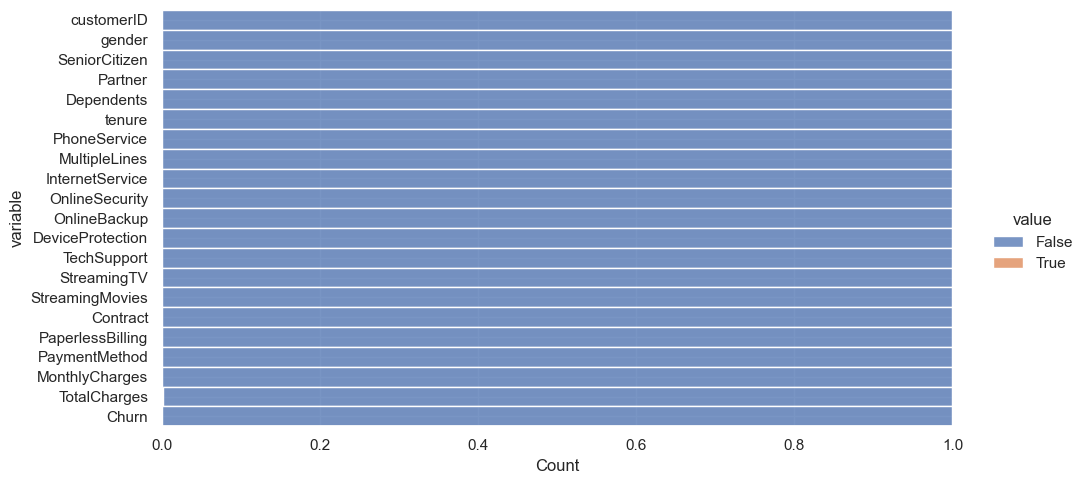

In [38]:
# Explrar datos fatantes 

# para contar todos los valores en total cuento agrego la función sum dentro de la otra 
(
    df_data
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data= df,
                y='variable',
                hue='value',
                multiple="fill",
                aspect= 2
            )
        )

    )
)
plt.show()

Teniendo en cuenta que solo hay 11 datos nulos y que estos no son representativos, se obtará por eleiminarlos

In [39]:
df_data.dropna(inplace= True)

## Eliminar variables irrelevantes para el modelo
como por ejemplo el, id el cual es un número que incrementa, pero no aporta valor

In [40]:
df_data.drop('customerID', axis= 1, inplace= True)

In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7045
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7033 non-null   object 
 1   SeniorCitizen     7033 non-null   float64
 2   Partner           7033 non-null   object 
 3   Dependents        7033 non-null   object 
 4   tenure            7033 non-null   float64
 5   PhoneService      7033 non-null   object 
 6   MultipleLines     7033 non-null   object 
 7   InternetService   7033 non-null   object 
 8   OnlineSecurity    7033 non-null   object 
 9   OnlineBackup      7033 non-null   object 
 10  DeviceProtection  7033 non-null   object 
 11  TechSupport       7033 non-null   object 
 12  StreamingTV       7033 non-null   object 
 13  StreamingMovies   7033 non-null   object 
 14  Contract          7033 non-null   object 
 15  PaperlessBilling  7033 non-null   object 
 16  PaymentMethod     7033 non-null   object 


## convertir a numérico la variable objetivo

In [42]:
df_data['Churn'].replace(to_replace='Yes', value= 1, inplace= True)
df_data['Churn'].replace(to_replace='No', value= 0, inplace= True)

In [43]:
#verificar el cambio
df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7039    0
7040    0
7041    1
7043    0
7045    0
Name: Churn, Length: 7033, dtype: int64

##  Manejo de variables categóricas

Se hará un onehot con todas las variables, para facilitar el aprendizaje de máquina

In [44]:
## hacer una copia para no dañar el DF original 
data_prosess = df_data.copy()

In [45]:
data_prosess.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
data_prosess.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Análisis de correlación

In [59]:
# combertir las variables a dummies

data_prosess= pd.get_dummies(data_prosess)
data_prosess.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0.0,34.0,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.0,2.0,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.0,45.0,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0.0,2.0,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


En la grafica se puede apreciar: la variable genero no afecta en gran medida Si tiene un contrato mes a mes es muy problable que haga churn Si e contrato en anual no es problable que haga churn

# Escalabilidad de los datos
Aquí se van a llevar a los datos a una misma escala para poder manejar los datos por la librería skleanr y disminuir los sesgos

In [48]:
scaler = MinMaxScaler()

In [49]:
data_process_escaled = scaler.fit_transform(data_prosess)

In [50]:
data_process_escaled

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [51]:
# Pasar el tensor a un DF

data_process_escaled  = pd.DataFrame(data_process_escaled)
data_process_escaled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [52]:
# al convertirlo en una array esta pierde los nombre lo  columna, se requiere utilizar .colums junto con sus propiedades 

data_process_escaled.columns = data_prosess.columns

In [53]:
data_process_escaled.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Análisis exploratorio de las variables

se evaluaran las variables categoricas

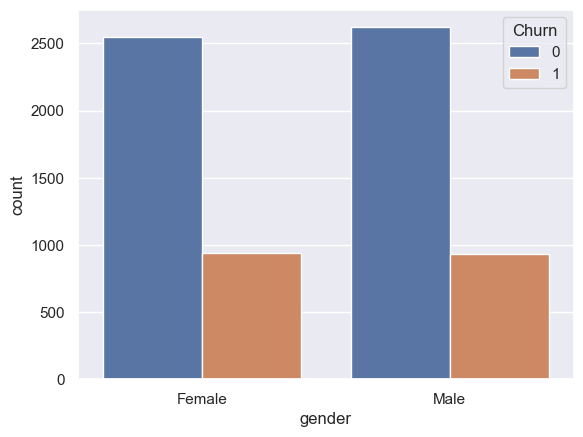

In [60]:
fig = sns.countplot(
    data= df_data,
    x= 'gender',
    hue= 'Churn'
)
plt.show()

Se puede apreciar que el comportamiento de los genero en cuanto a hacer churn es el mismo

In [55]:
def plot_categoria(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [56]:
# creamos un objeto con las cariables donde se incluyan las variablles categoricas
column_catategoricas = df_data.select_dtypes(include='object').columns

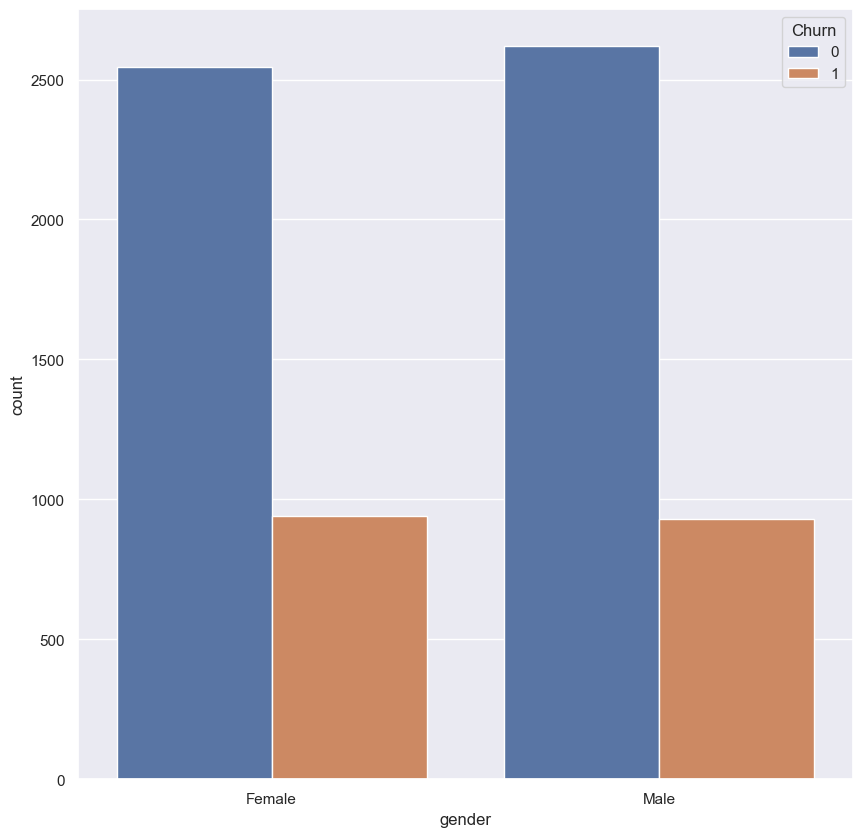

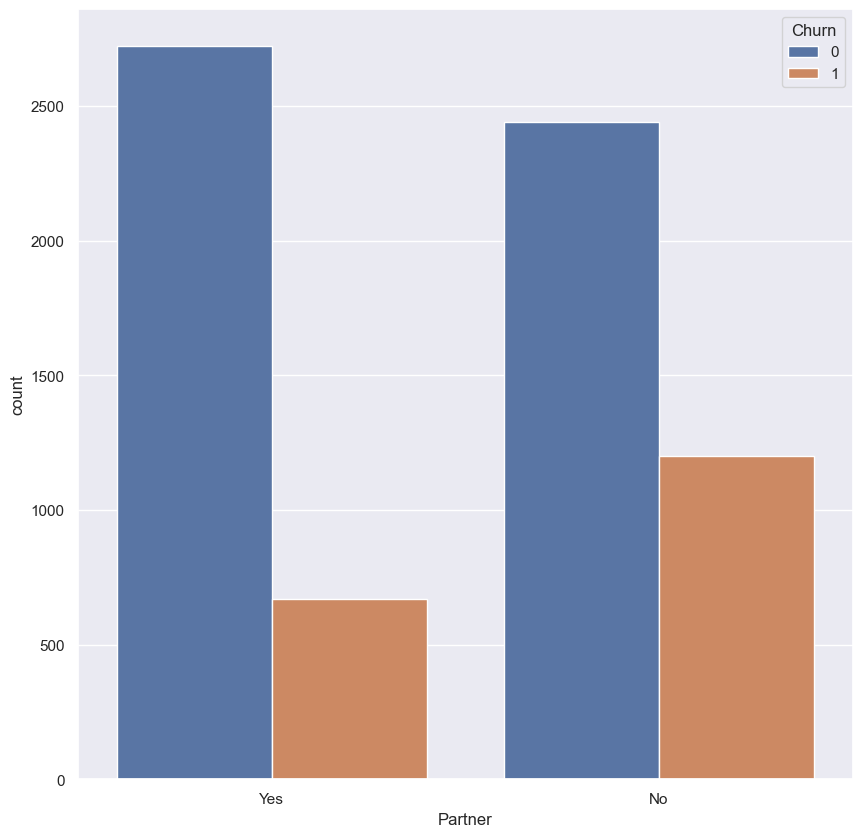

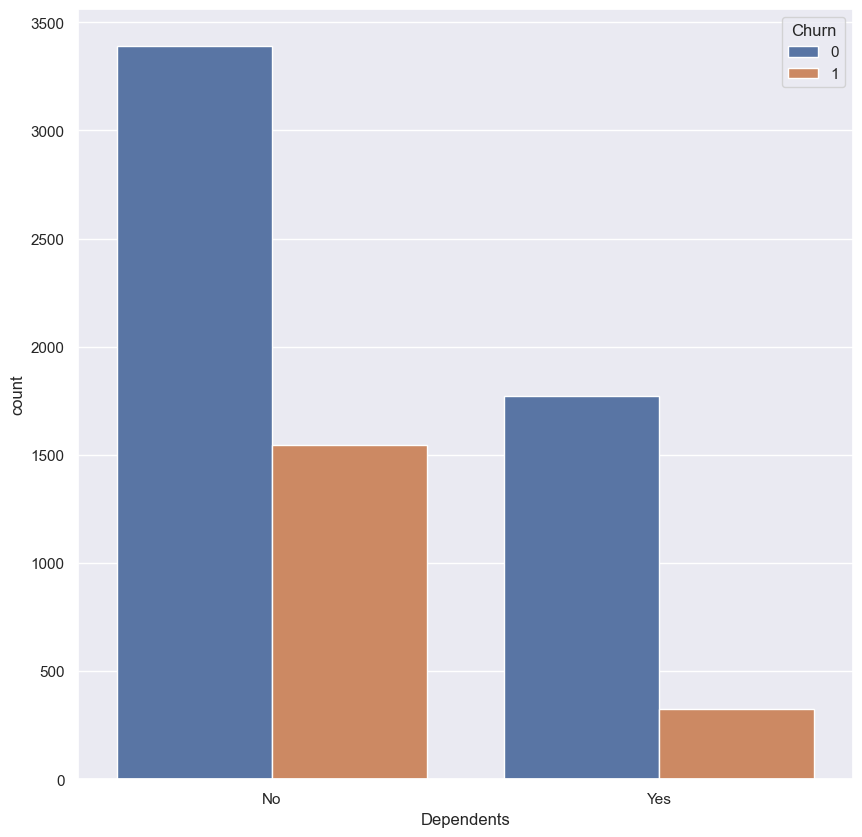

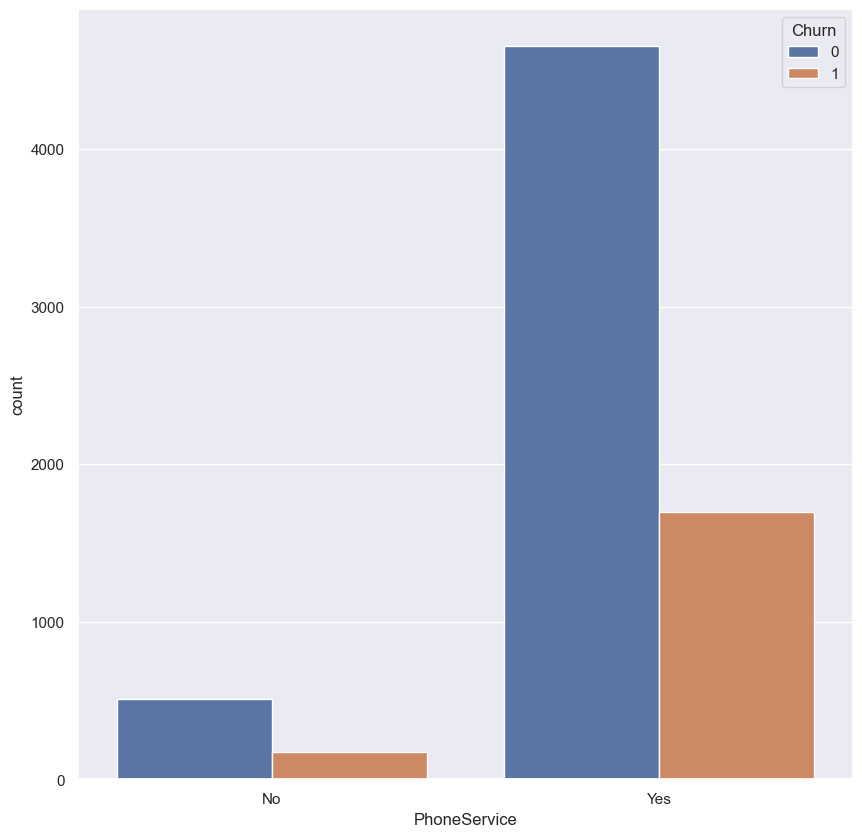

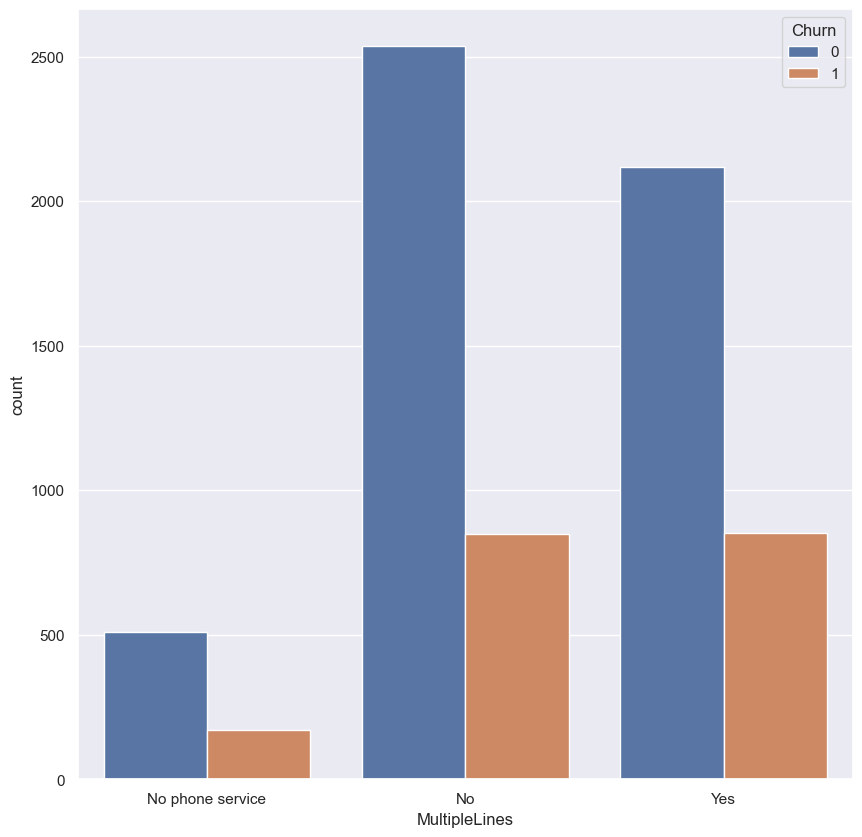

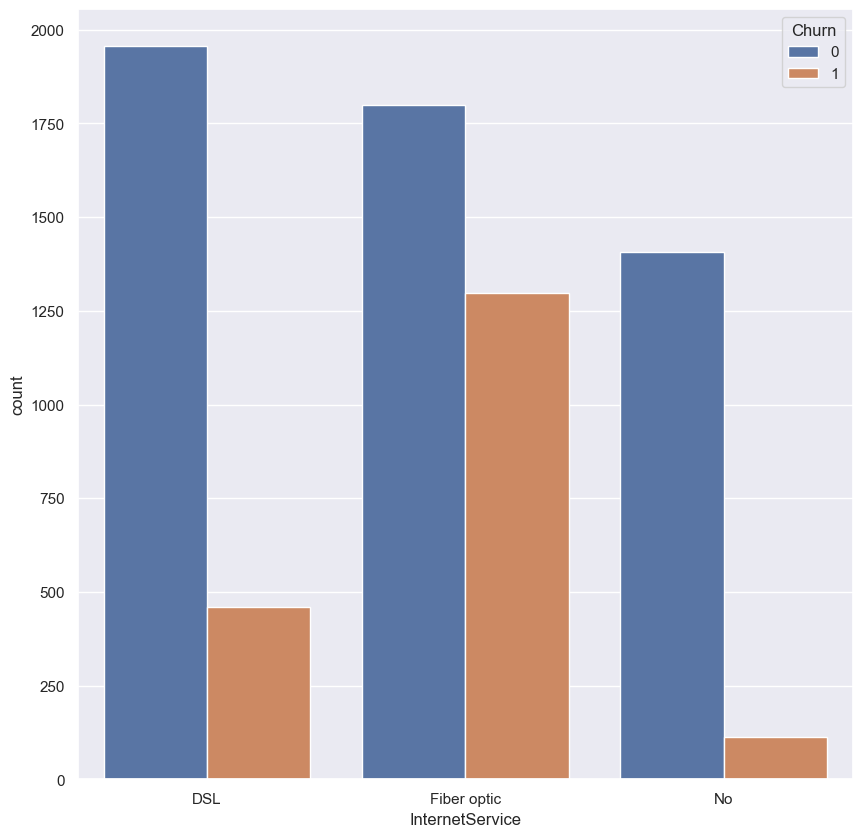

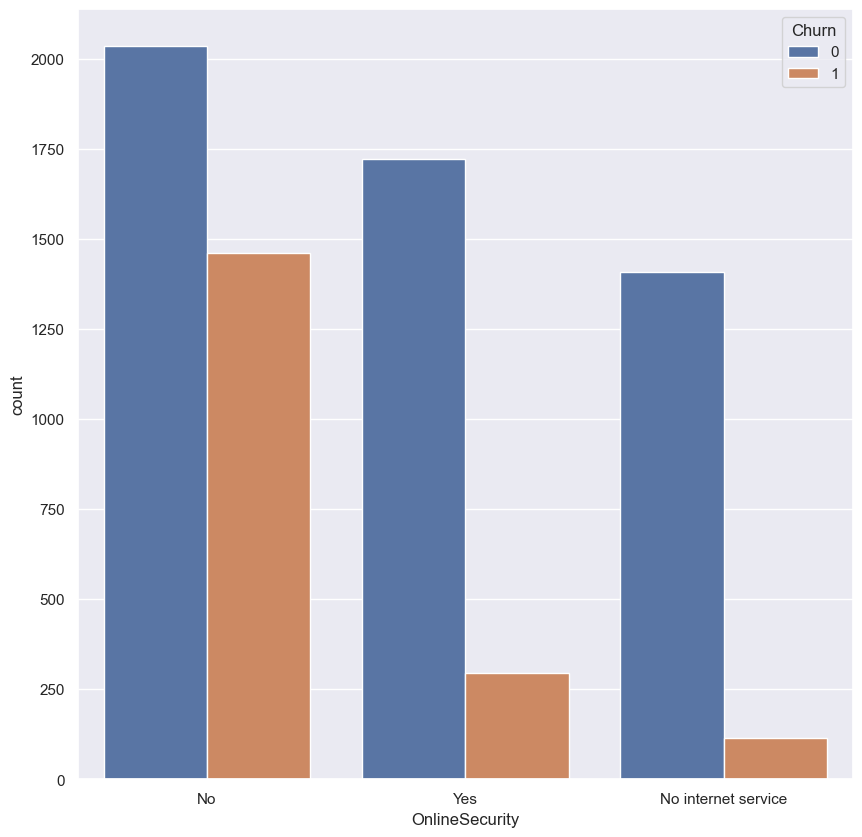

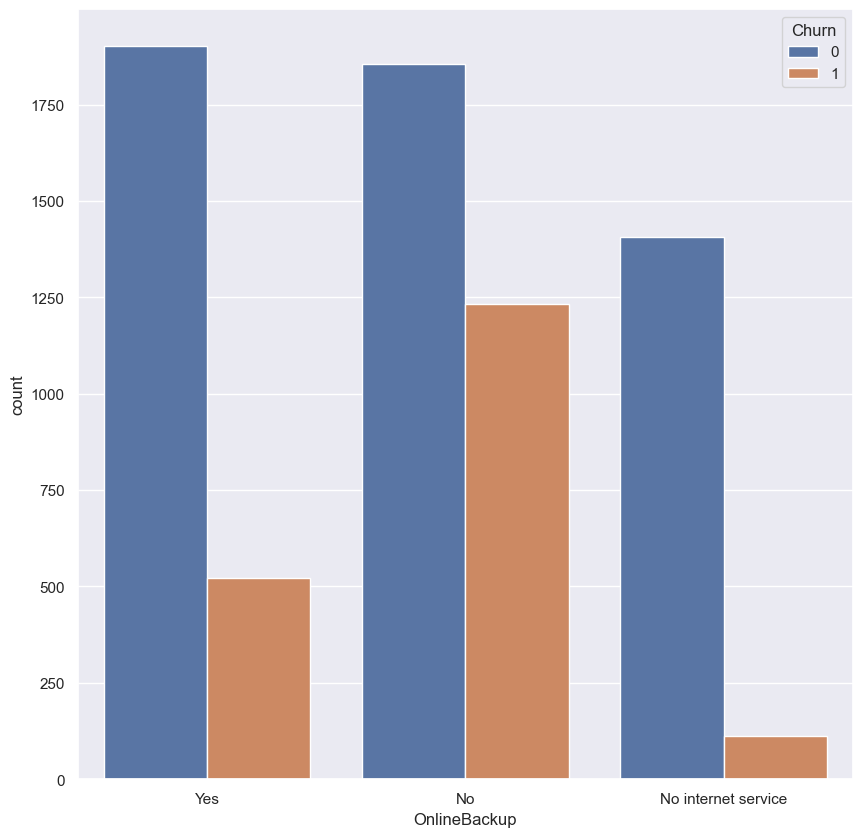

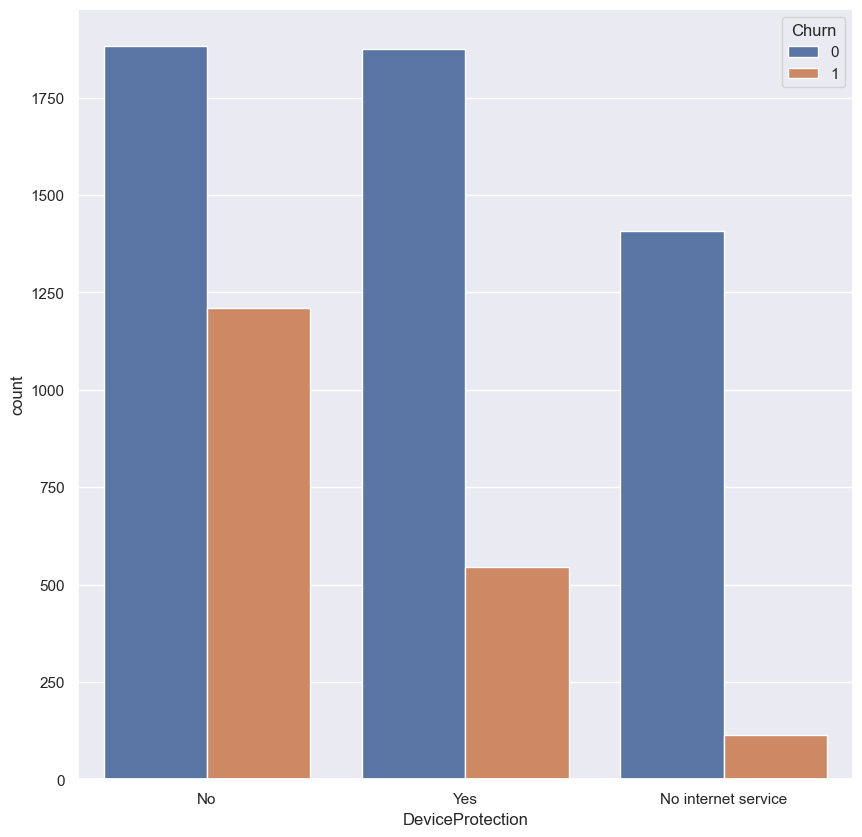

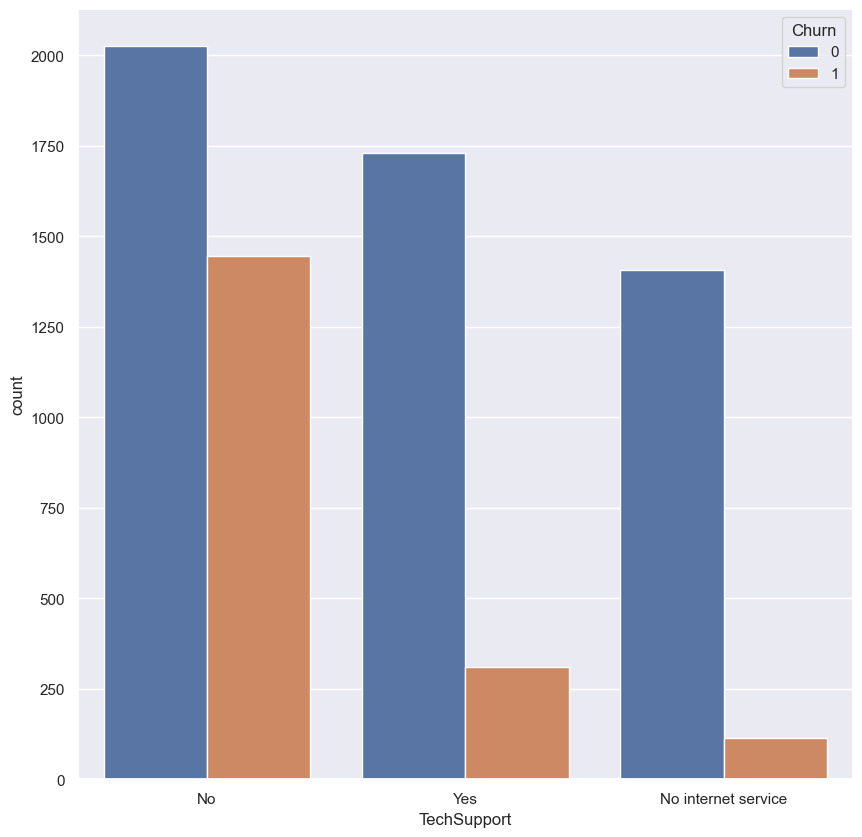

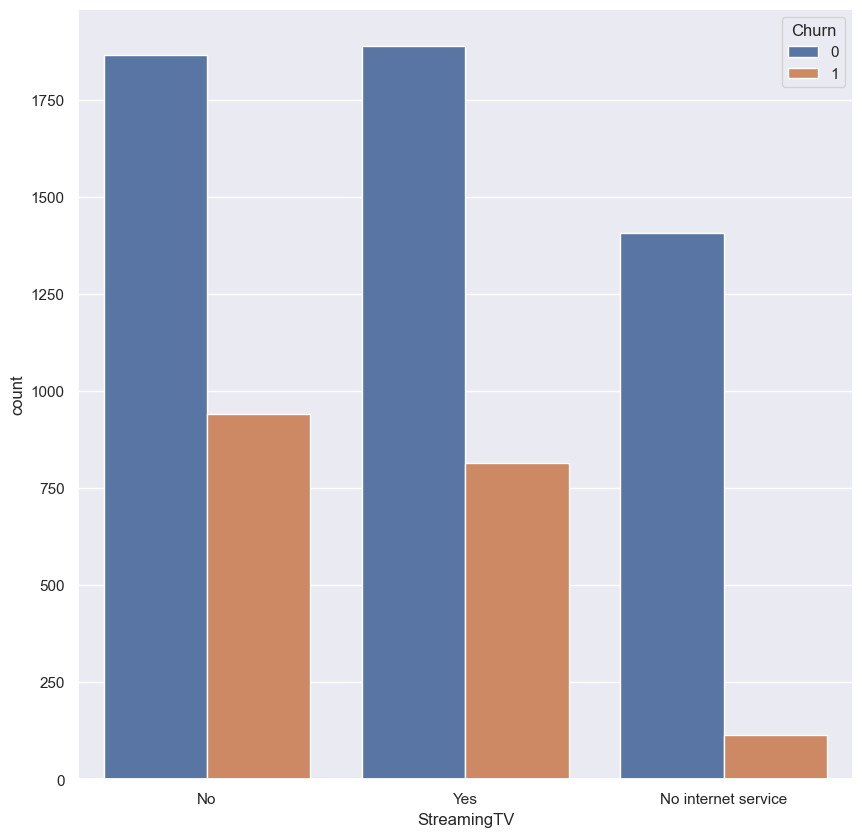

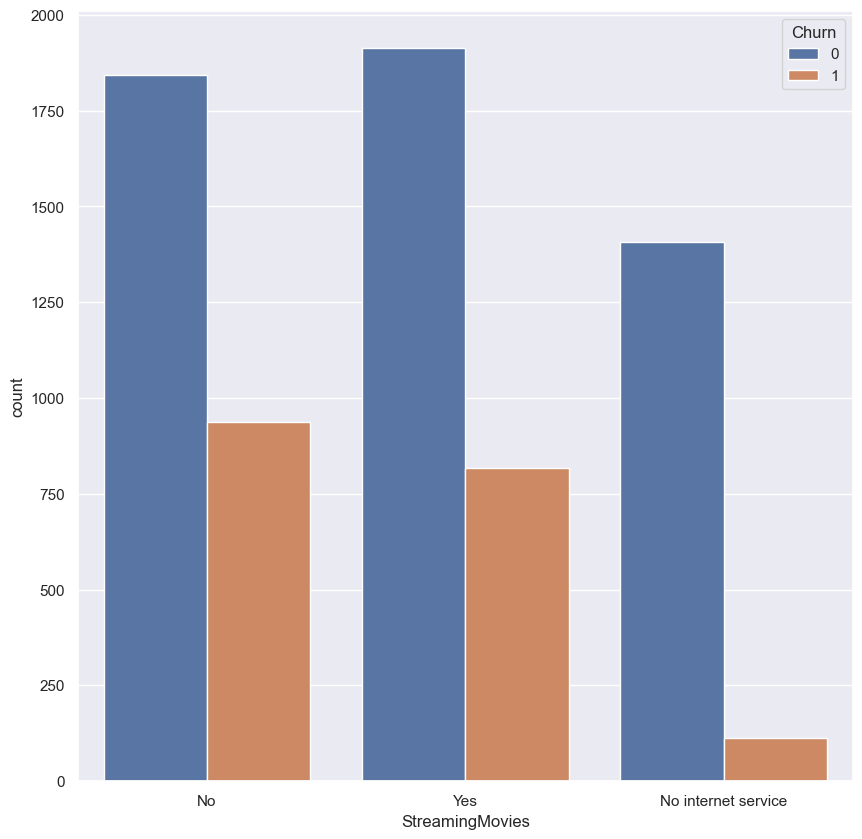

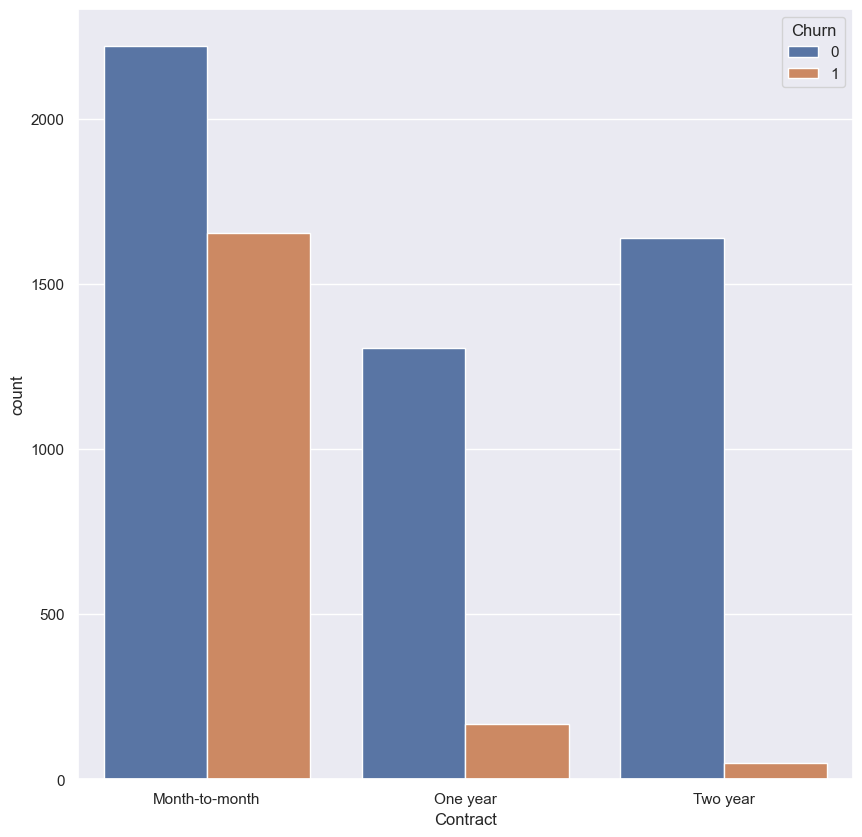

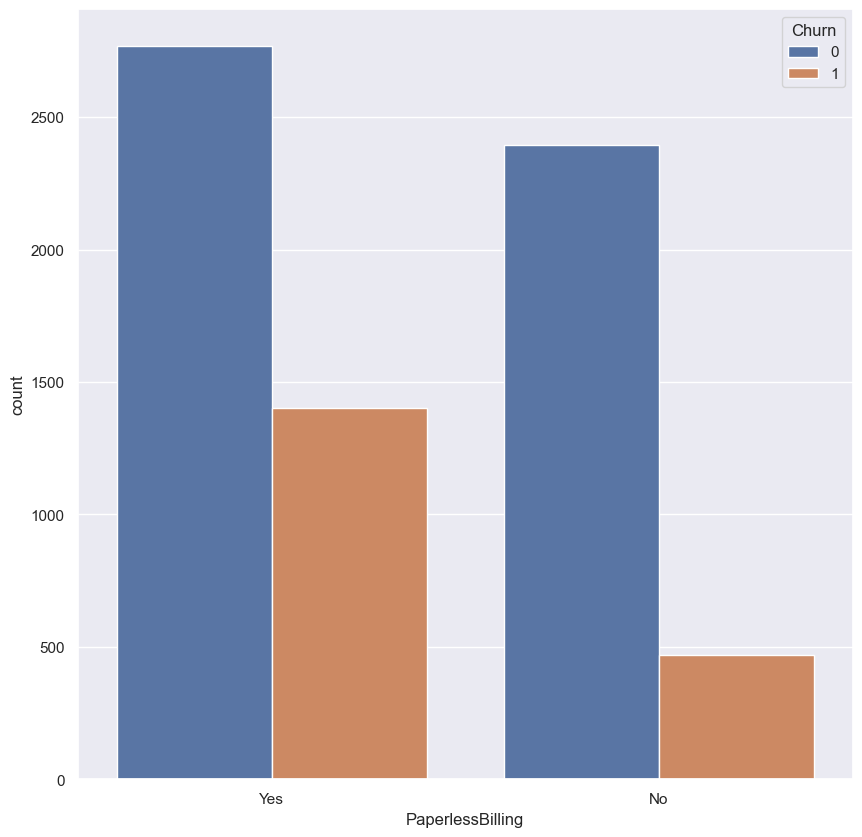

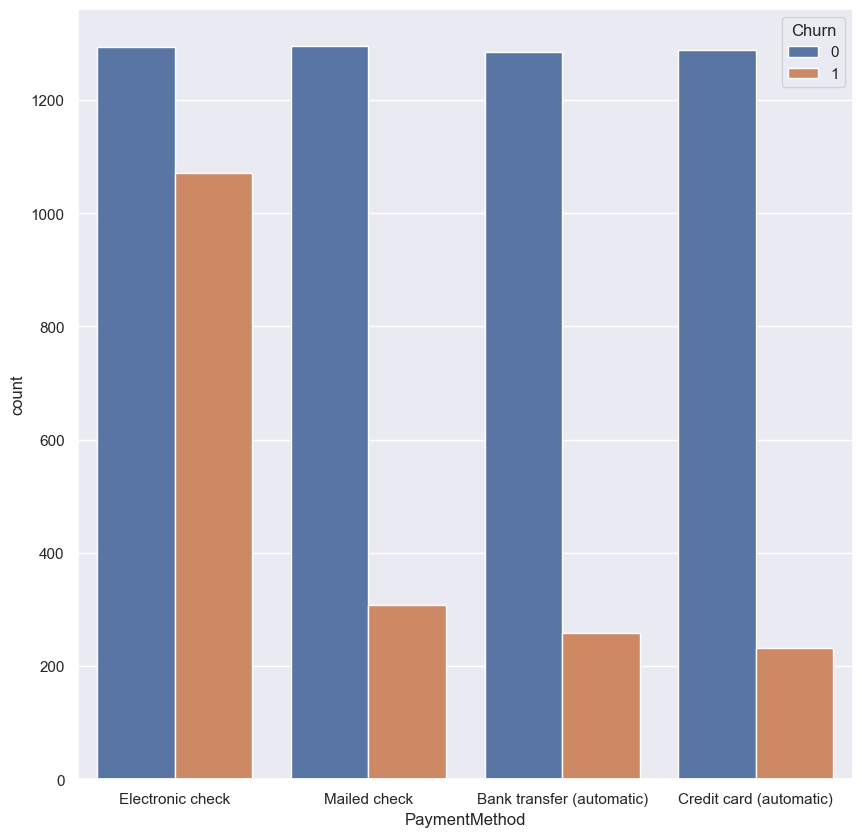

In [61]:
# se crea el bocle loop
for _ in column_catategoricas:
    plot_categoria(_)

## Notas:

La mayoría de clientes tienen servicio telefónico y aparentemente no influye en el churn 

Los usuarios con fibra óptica son más propensos a hacer churn que los  de Dsl

Los usuarios con servicios de seguridad en línea no son menos propensos a hacer churn que los que no poseen este servicio 

Los usuarios sin servicio de servidor , son menos propensos al retiro, tal vez por el incremento en los precios 

Los usuarios mas antiguos hacen menos churn 

Los usuarios que paga de forma electrónica, tiene mas retiros que el resto de clientes, además los que pagan con tarjeta 

de crédito, de forma automática con los que poseen la menor probabilidad de retiro 

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

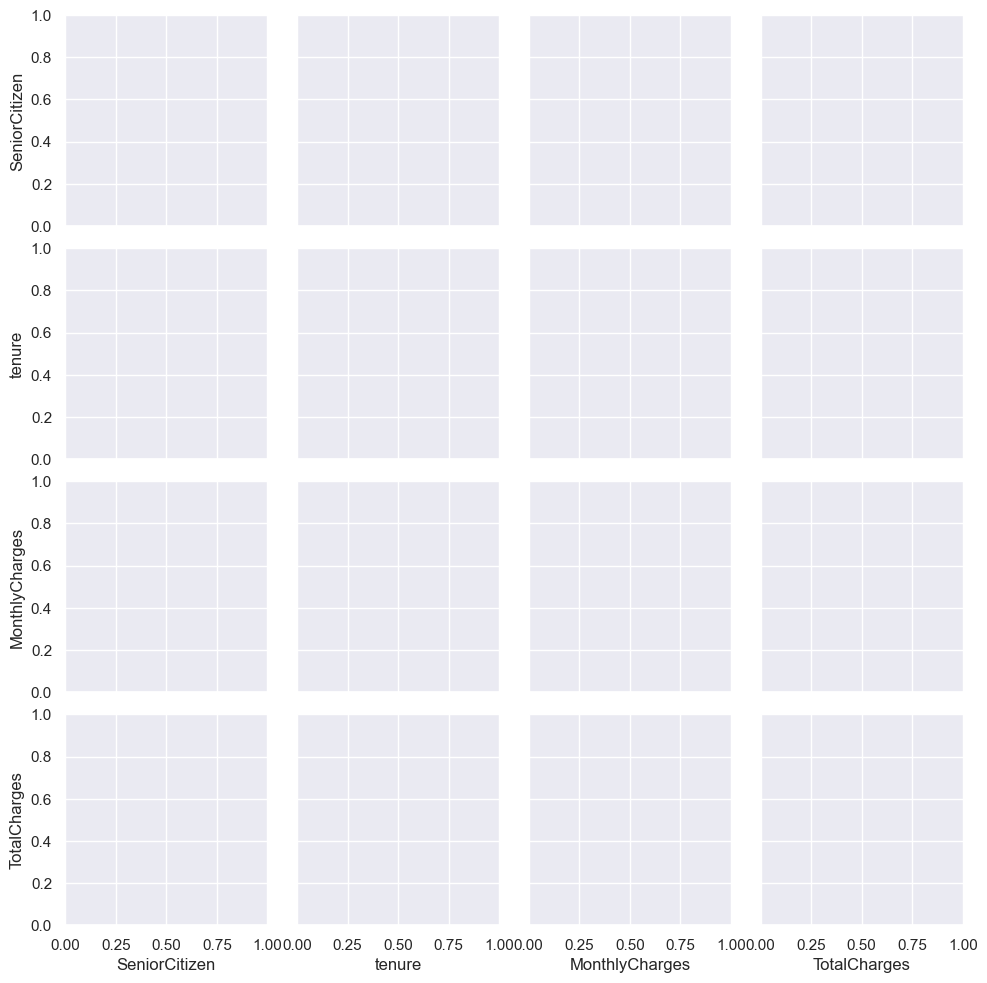

In [58]:
# El pairplor solo va a tomar datos categoricos

sns.pairplot(
    data= df_data, hue= 'Churn'
)
plt.show()

1.Se encuentra que los usuarios con cargos mensuales muy altos, y as su vez, sus cargos totales no llevan generandose por tanto tiempo , tienden a tener una mayor probailidad de retiro o churn

2.Entre más tiempo posea en la compañía y menor sea el cargo mensual, este tiene menor probabilidad de hacer churn

# Entrenamiento del modelo binomial

Para lograr este objetivo, primero se separa la variable objetivo de las regresoras, donde la variable 'y' solo comserva valores de 0 a 1 y este es un array

In [ ]:
x = data_process_escaled.drop('Churn', axis= 1)
y= data_process_escaled['Churn'].values

In [ ]:
x.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# En este apartado separamos el train y el test, se saca la proporción de train y test
# finalemnte se fija la semilla para resultados replicables 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [ ]:
# Verificar la proporción de los datos 

print('El valor de x_train es de',  x_train.shape) 
print('El valor de x_test es de ',  x_test.shape)
print('='*40)
print('El valor de y_train es de',  y_train.shape) 
print('El valor de y_test es de ',  y_test.shape)

El valor de x_train es de (4923, 45)
El valor de x_test es de  (2110, 45)
El valor de y_train es de (4923,)
El valor de y_test es de  (2110,)


In [ ]:
# Crear el objeto modelo

modelo1= LogisticRegression(max_iter= 10000 ) 

In [ ]:
# Ajustar el modelo con el 'x 'y 'y' train

modelo1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# hacer las predicciones del modelo sobr el test 

prediccion_modelo1 = modelo1.predict(x_test)

# Para el score  accuracy, se envia el valor corecto sobre el estimado

print(metrics.accuracy_score(y_test, prediccion_modelo1))

0.8023696682464455


In [ ]:
# reporte de clasificación 
print( classification_report(y_test, prediccion_modelo1))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1564
         1.0       0.64      0.55      0.59       546

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



# Evaluación del modelo

In [ ]:
# En esta seccion muestra en un array la probabilidad de que sea '0' y la probablidad de que sea '1'

modelo1.predict_proba(x_test)

array([[0.99738948, 0.00261052],
       [0.80823263, 0.19176737],
       [0.97105466, 0.02894534],
       ...,
       [0.80992046, 0.19007954],
       [0.99175122, 0.00824878],
       [0.7110914 , 0.2889086 ]])

In [ ]:
# Este apartamdo muestra la importancia de las diferetes features a la hora de hacer la predicción 
modelo1.coef_

array([[ 2.37829836e-01, -2.99382438e+00, -1.32050953e-01,
         1.13024714e+00, -1.30212138e-03,  2.07152881e-03,
        -2.14733747e-02,  2.22427821e-02,  1.25796153e-01,
        -1.25026745e-01,  1.28062309e-01, -1.27292902e-01,
        -1.65607424e-01,  1.28062309e-01,  3.83145217e-02,
        -4.03951954e-01,  5.13055109e-01, -1.08333747e-01,
         2.20308539e-01, -1.08333747e-01, -1.11205384e-01,
         1.00665073e-01, -1.08333747e-01,  8.43808197e-03,
         6.36963865e-02, -1.08333747e-01,  4.54067684e-02,
         2.72505465e-01, -1.08333747e-01, -1.63402310e-01,
        -8.83919141e-02, -1.08333747e-01,  1.97495069e-01,
        -7.29302066e-02, -1.08333747e-01,  1.82033361e-01,
         7.35864228e-01,  3.98425575e-02, -7.74937378e-01,
        -1.69711081e-01,  1.70480489e-01, -1.00009121e-02,
        -1.90281422e-01,  2.19995502e-01, -1.89437604e-02]])

In [ ]:
# En este partado se muestran la etiquetas que se están utilizando para entrenal el modelo 
modelo1.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

In [ ]:
# se llama a las 10 variables con más peso en el modelo preddicho
# se utiliza da tata prosesada y estandarizada

pesos = pd.Series(modelo1.coef_[0],
                    index=x.columns.values) 

AxesSubplot(0.125,0.11;0.775x0.77)


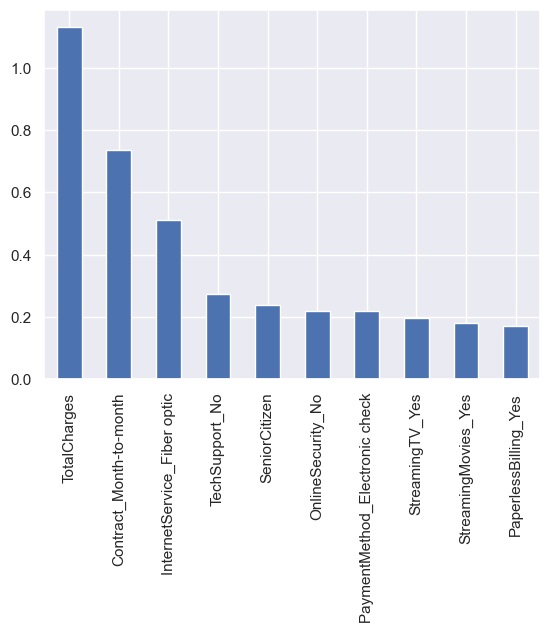

In [ ]:
# Se grafican las variables 
print(
    pesos.sort_values(ascending=False)[:10
    
    ].plot(kind='bar')
)
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


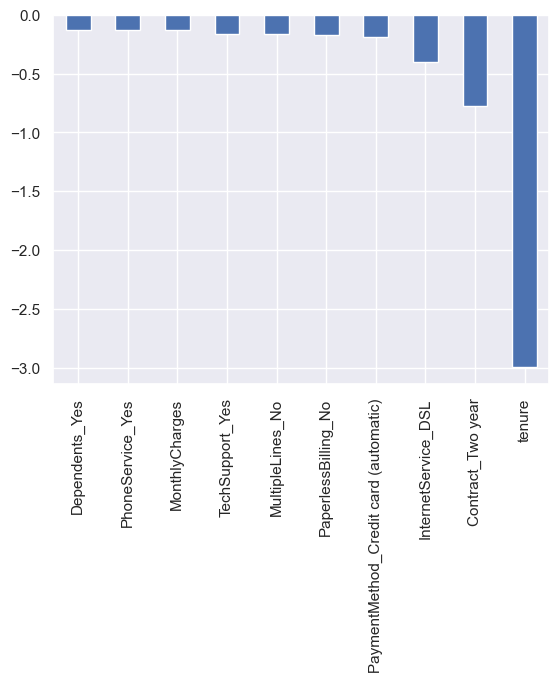

In [ ]:
# Grafica de las variables con menor peso
print(
    pesos.sort_values(ascending=False)[-10:].plot(kind='bar')
)
plt.show()

Si tiene un contrato de mes a mes, cargos muy altos, servicio de fibra optica intermintente, cuenta con seguridad online, si es una persona mayor cuenta conmayor probabilidad de retiro o hacer Churn

Los clientes con más tiempo en la empresa son lo que poeen menor probabilidad de retiro, seguido de ello los que poeen contrato a dos años, y por ultimo, lo que tienen internet DSL

In [ ]:
# Reporte de clasificación 
print(classification_report(y_test, prediccion_modelo1))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1564
         1.0       0.64      0.55      0.59       546

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



<Figure size 1100x1100 with 0 Axes>

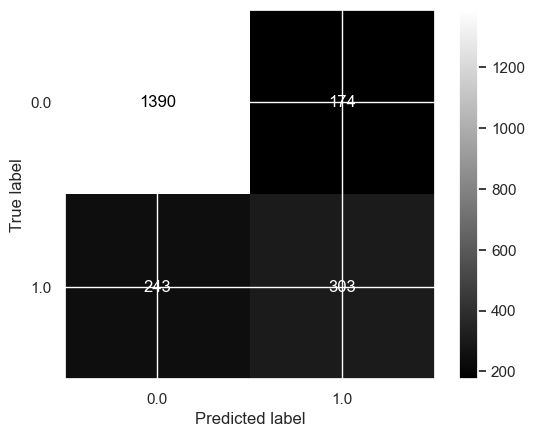

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediccion_modelo1,  labels=modelo1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelo1.classes_)
disp.plot(cmap='gray')
plt.show()

En la matriz de confusión de puede apreciar que el modelo acertó 1381 veces en los clientes que no hicieron churn, a su vez fallo, en 263

Para los clientes que si lo hicieron, acertó en 298 y fallo en 168, esta disparidad, probablemente es ocasionada por datos inbalanceados

In [ ]:
# se visualizan las correlaciones más fuertes con el comando .sort
pesos.sort_values()

tenure                                    -2.993824
Contract_Two year                         -0.774937
InternetService_DSL                       -0.403952
PaymentMethod_Credit card (automatic)     -0.190281
PaperlessBilling_No                       -0.169711
MultipleLines_No                          -0.165607
TechSupport_Yes                           -0.163402
MonthlyCharges                            -0.132051
PhoneService_Yes                          -0.127293
Dependents_Yes                            -0.125027
OnlineSecurity_Yes                        -0.111205
DeviceProtection_No internet service      -0.108334
InternetService_No                        -0.108334
TechSupport_No internet service           -0.108334
OnlineBackup_No internet service          -0.108334
OnlineSecurity_No internet service        -0.108334
StreamingMovies_No internet service       -0.108334
StreamingTV_No internet service           -0.108334
StreamingTV_No                            -0.088392
StreamingMov

# Regularización

## L1 Lasso

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

*C* es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [ ]:
# Crear objeto lasso, con el solver saga
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)

# ajustra el comedo .fit()
lasso.fit(x_train, y_train)

LogisticRegression(C=0.5, max_iter=10000, penalty='l1', solver='saga')

In [ ]:
# Predicciones
prediccion_lasso = lasso.predict(x_test)

print("Lasso",metrics.accuracy_score(y_test, prediccion_lasso))

Lasso 0.8033175355450237


In [ ]:
lasso_pesos = pd.Series(lasso.coef_[0], index = x.columns.values).sort_values(ascending=False)

<Figure size 1100x1100 with 0 Axes>

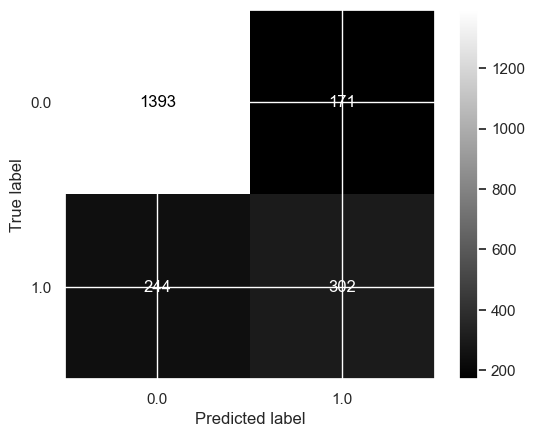

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediccion_lasso,  labels=lasso.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lasso.classes_)
disp.plot(cmap='gray')
plt.show()

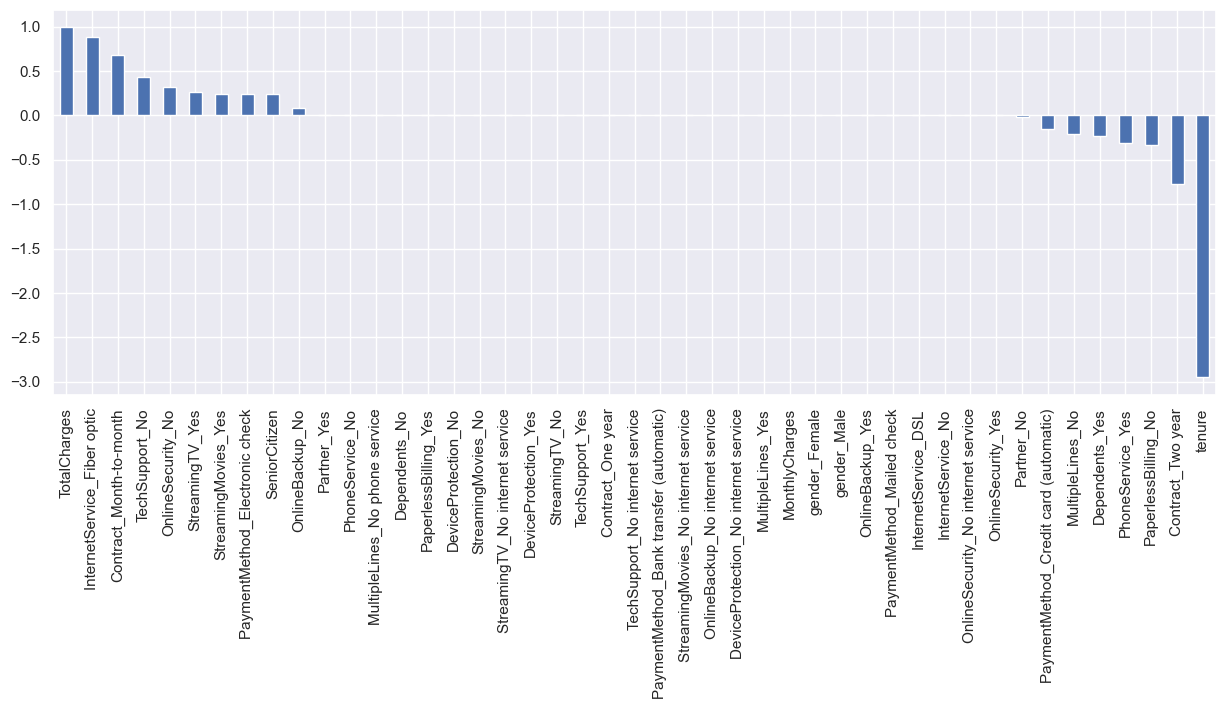

In [ ]:
fig = plt.figure(figsize=(15,5))
lasso_pesos.plot(kind='bar')
plt.show()

Este metodo reduce a cero las variables menos sgnificativas

In [ ]:
# las siguuientes variales son eliminadas
lasso_pesos[lasso_pesos==0]

StreamingMovies_No                         0.0
StreamingTV_No internet service            0.0
DeviceProtection_Yes                       0.0
StreamingTV_No                             0.0
TechSupport_Yes                            0.0
Contract_One year                          0.0
TechSupport_No internet service            0.0
PaymentMethod_Bank transfer (automatic)    0.0
StreamingMovies_No internet service        0.0
OnlineBackup_No internet service           0.0
DeviceProtection_No internet service       0.0
MultipleLines_Yes                          0.0
MonthlyCharges                             0.0
gender_Female                              0.0
gender_Male                                0.0
OnlineBackup_Yes                           0.0
PaymentMethod_Mailed check                 0.0
InternetService_DSL                        0.0
InternetService_No                         0.0
OnlineSecurity_No internet service         0.0
OnlineSecurity_Yes                         0.0
dtype: float6

# L2 Ridge
Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo. Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [ ]:
# Crear el objeto ridge lgistic  

ridge = LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)

In [ ]:
# Entrenar modelo

ridge.fit(x_train, y_train)

LogisticRegression(C=0.5, max_iter=10000, solver='saga')

In [ ]:
# predicción del modelo 

predicción_ridge = lasso.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, predicción_ridge)

<Figure size 1100x1100 with 0 Axes>

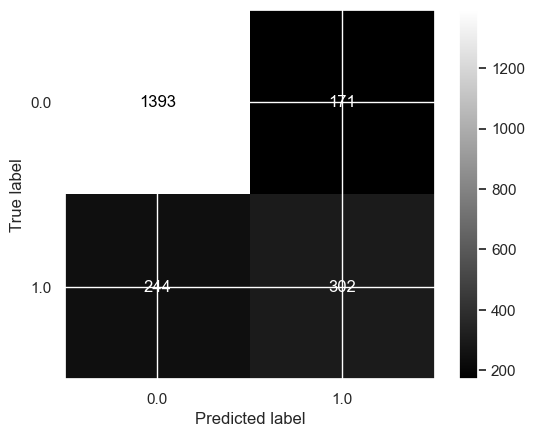

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, predicción_ridge,  labels=ridge.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=ridge.classes_)
disp.plot(cmap='gray')
plt.show()

# Comparativa del modelo inicial vs lasso y ridge

In [ ]:
# comparativa accuracy
prediccion_lasso = lasso.predict(x_test)

#Comparativa de los dos modelos 
print("Modelo 1",metrics.accuracy_score(y_test, prediccion_modelo1))
print("="*30)
print("Lasso   ",metrics.accuracy_score(y_test, prediccion_lasso))
print("="*30)
print("Ridge   ",metrics.accuracy_score(y_test, predicción_ridge))

Modelo 1 0.8023696682464455
Lasso    0.8033175355450237
Ridge    0.8033175355450237


Como su puede apreciar, no hay un ganador definitivo, sin embargo, los modelo creados con lasso y ridge poseen mejores accuracy que el original, por ende se puede utilizar cualquiera de los modelos propuestos 